In [1]:
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
%run programs.py
%run mtf.py

Obtenemos la imagen total

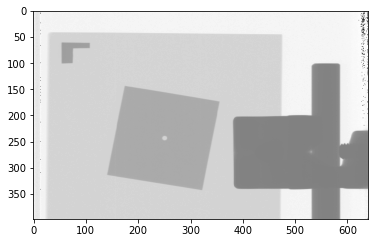

In [3]:
#Imagen total
img=readDat('mts2.dat',640)
image_png=Image.fromarray(img)
image_png.save('imagen.png')
plt.imshow(img,cmap='gray')

Obtenemos la MTF para los lados verticales

numero de lineas: 60 longitud de las lineas 20


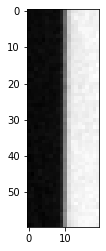

In [4]:
#Resize region
img_resized=region(img,11.3,235,295,190,210)
plt.imshow(img_resized,cmap='gray')


numero de lineas: 60 longitud de las lineas 20


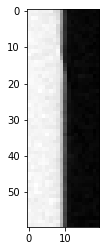

In [5]:
#Resize de la región opuesta
img_resized2=region(img,11.3,235,295,374,394)
plt.imshow(img_resized2,cmap='gray')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

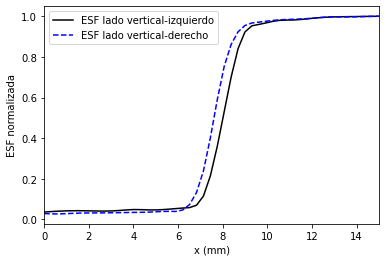

In [6]:
#Obtenemos el edge function con puntos interpolado y ploteamos:

edge,axis=edgeFunction(img_resized,50)
edge2,axis2=edgeFunction(img_resized2,50)
edge2=edge2[::-1]

plt.plot(axis*0.8,edge/max(edge),'-k',label='ESF lado vertical-izquierdo')
plt.plot(axis2*0.8,edge2/max(edge2),'--b',label='ESF lado vertical-derecho')
plt.legend(loc='best')
plt.ylabel('ESF normalizada')
plt.xlim(0,15)
plt.xlabel('x (mm)')
plt.savefig('esfvertical.eps')
plt.show

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

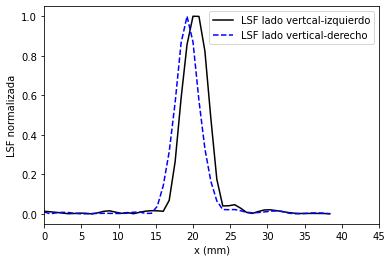

In [7]:
#Ahora la lsf derivando:

lsf,axis=LSF(edge)
lsf2,axis2=LSF(edge2)

plt.plot(axis*0.8,lsf/max(lsf),'-k',label='LSF lado vertcal-izquierdo')
plt.plot(axis2*0.8,lsf2/max(lsf2),'--b',label='LSF lado vertical-derecho')
plt.legend(loc='best')
plt.ylabel('LSF normalizada')
plt.xlim(0,45)
plt.xlabel('x (mm)')
plt.savefig('lsfvertical.eps')
plt.show

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

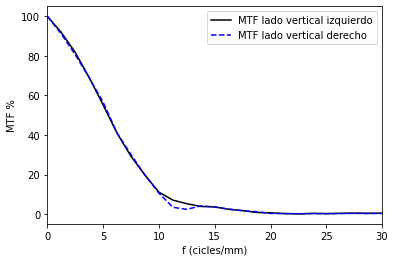

In [8]:

#Finalmente la MTF

mtf=MTF(lsf)
mtf2=MTF(lsf2)
plt.plot(axis2/0.8,mtf2*100/max(mtf2),'-k',lw=1.5, label='MTF lado vertical izquierdo')
plt.plot(axis/0.8,mtf/max(mtf)*100,'--b',lw=1.5,label='MTF lado vertical derecho')
plt.xlim(0,30)
plt.legend(loc='best')
plt.ylabel('MTF %')
plt.xlabel('f (cicles/mm)')
plt.savefig('mtfhorizontal.eps')
plt.show

Ahora repetimos la MTF para los lados horizontales

numero de lineas: 20 longitud de las lineas 100


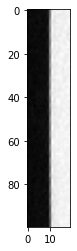

In [9]:
#Resize region
img_resized3=region(img,9,205,225,200,300).transpose()
plt.imshow(img_resized3,cmap='gray')


numero de lineas: 20 longitud de las lineas 100


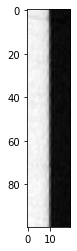

In [10]:
#Resize region opuesta
img_resized4=region(img,9,378,398,200,300).transpose()
plt.imshow(img_resized4,cmap='gray')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

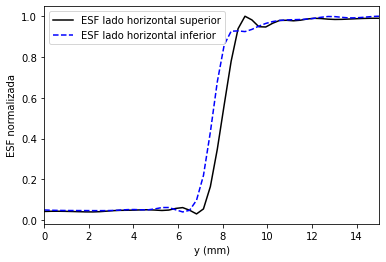

In [11]:
#Obtenemos el edge function con puntos interpolado:

edge3,axis3=edgeFunction(img_resized3,50)
edge4,axis4=edgeFunction(img_resized4,50)
edge4=edge4[::-1]

plt.plot(axis3*0.8,edge3/max(edge3),'-k',label='ESF lado horizontal superior')
plt.plot(axis4*0.8,edge4/max(edge4),'--b',label='ESF lado horizontal inferior')
plt.legend(loc='best')
plt.ylabel('ESF normalizada')
plt.xlim(0,15)
plt.xlabel('y (mm)')
plt.savefig('esfhorizontal.eps')
plt.show

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

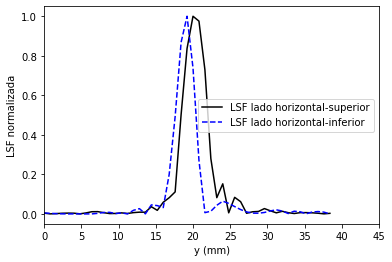

In [12]:
#ahora la lsf derivando

lsf3,axis3=LSF(edge3)
lsf4,axis4=LSF(edge4)

plt.plot(axis3*0.8,lsf3/max(lsf3),'-k',label='LSF lado horizontal-superior')
plt.plot(axis4*0.8,lsf4/max(lsf4),'--b',label='LSF lado horizontal-inferior')
plt.legend(loc='best')
plt.xlim(0,45)
plt.ylabel('LSF normalizada')
plt.xlabel('y (mm)')
plt.savefig('lsfhorizontal.eps')
plt.show

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

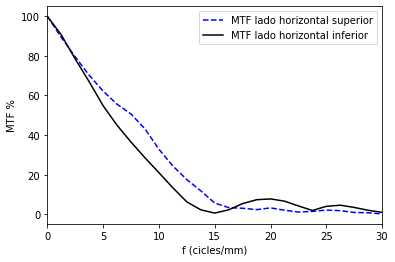

In [13]:
#Finalmente la MTF

mtf3=MTF(lsf3)
mtf4=MTF(lsf4)
plt.plot(axis4/0.8,mtf4*100/max(mtf4),'--b',lw=1.5, label='MTF lado horizontal superior')
plt.plot(axis3/0.8,mtf3/max(mtf3)*100,'-k',lw=1.5,label='MTF lado horizontal inferior')
plt.xlim(0,30)
plt.legend(loc='best')
plt.ylabel('MTF %')
plt.xlabel('f (cicles/mm)')
plt.savefig('mtfvertical.eps')
plt.show

Comparación lado vertical vs horizontal:


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(close=None, block=None)>

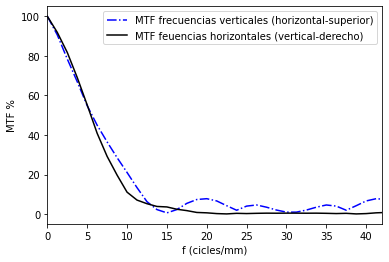

In [14]:
#Ploteamos las dos MTF

plt.plot(axis3/0.8,mtf3*100/max(mtf3),'-.b',lw=1.5, label='MTF frecuencias verticales (horizontal-superior)')
plt.plot(axis2/0.8,mtf2/max(mtf2)*100,'-k',lw=1.5,label='MTF feuencias horizontales (vertical-derecho)')
plt.xlim(0,42)
plt.legend(loc='best')
plt.ylabel('MTF %')
plt.xlabel('f (cicles/mm)')
plt.savefig('mtfcomparacion.eps')
plt.show